<h1 align="center"> Assessing Punishment in Public School </h1>

<h3 align="center"> By Josiah Kim </h3>

## Project Idea

Initially, the idea was to create a visualization in parallel to a research project conducted in another class. The previous research question was: Could it be that the judicial systems put in place in these locations are socializing the judicial systems within the publicschool systems?

I have since changed the topic for my research project in the other class. However, still interested in punishment within public schools, I decided to continue the topic for my visualization. My research question now states: **How likely are black students to face punishment compared to their white counterparts within the public school system?**

In another class last year, I conducted a surface-level analysis to evaluate if black students are disproportionately punished in public schools. Although not conclusive, I found this to be overwhelmingly true. Continuing this investigation, I am looking to create a state-level visualization aiming to show the liklihood of a black student to be punished compared to their white counterpart.  


## Data Sources (Acknowledgement) 

I draw from two sources of data:

1. Civil Rights Data Collection.(2021). CRDC (Version 5.0) [Civil Rights Data Collection]. Retrieved from https://ocrdata.ed.gov/assets/ocr/docs/2017-18-crdc-data.zip

2. United States Department of Agriculture. (2021). State FIPS Codes (Version 1.0) [FIPS Codes]. Retrieved from https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696

3. Original Link: https://gist.githubusercontent.com/michellechandra (Accessed 04/23/2021) Source Link: https://gist.githubusercontent.com/michellechandra/0b2ce4923dc9b5809922/raw/a476b9098ba0244718b496697c5b350460d32f99/us-states.json


Data source (1.) contains data reported by every public school in the United States. This database consists of multiple school-level datasets. I will be employing the *Enrollment*, *Corporal Punishment*, *Expulsions*, *Referrals and Arrests*, and *Suspensions* datasets.

Data source (2.) is a three-variable table that identifies the FIPS code for each state. Unfortunately, the table is in a non-downloadable format. The data from the website was scraped manually into a CSV file using the copy-and-paste function. 

Data source (3.) is a JSON file that is used to map the states to their locations on the map in D3. 

All datasets in (2.) and (3.) were join, by school, for analysis.


## Programming Sources (Acknowledgement) 

Bill Morris (2021) Modular US State Choropleth (Version 1.0) [Source Code]. https://bl.ocks.org/

## Prototype

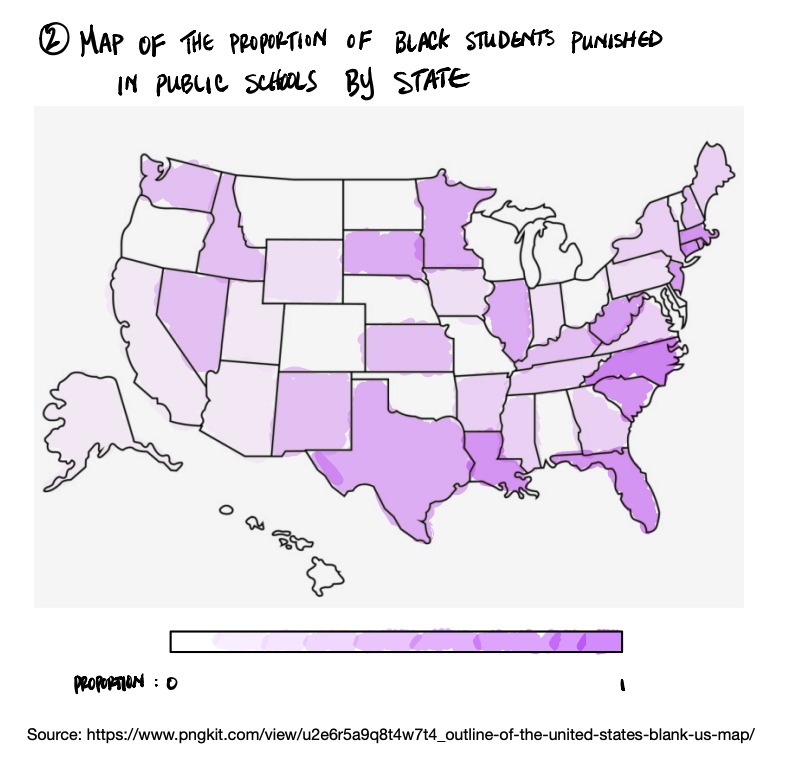

### Description

The prototype graph above visually establishes the disproportionate amount of black students punished within the school system. This graph will introduce a choropleth map of the United States to show where exactly we can find the greatest proportion of punishment of black students in the public school system. 

I introduce a sequential color encoding to represent the proportion for each state. The legend shows that the darker the shade of purple a state is colored, the greater the proportionality of black students who are punished. 

This graph can be directly replicated with the geo package in D3. 

## Final Graph

Below, the choropleth map of the United States shows the likelihood of a black student to be punished in public school compared to a white student  at the state level. You can interpret the data for a state by saying, for example, "California is 6.56% more likely to punish black students compared to white students within their public school system."

A transition is employed to show the true difference from "no punishment." The red sequential color encoding was chosen instead of purple because its color range was the most effective in showing the difference in proportions. As you hover your mouse over each state, a tooltip will pop up showing the name of the state and the likelihood of a black student to be punished in public school compared to their white counterpart in public school. The legend shows us that the darkest red represents the greatest likelihood which is around 22 percent.  

In [1]:
%%html
<table>
    <tr style="background-color:white">
        <td colspan="1" style="text-align: center;"><h1>Likelihood of Black Students to be Punished in Public School</h1></td>
    </tr>
    <tr style="background-color:white">
        <td><div id="map"></div></td>
    </tr>
    <tr style="background-color:white">
        <td colspan="1"><div id="legend"></div></td>
    </tr>
</table>

Likelihood of Black Students to be Punished in Public School
""
""


###  Final Graph Write-Up

**Main Variable**

My main variable of interest is prop_punishment_comp. The values for this variable were calculated using this equation:

$(\frac{Proportion of Black Students Punished}{Proportion of Black Students Enrolled})$ - $(\frac{Proportion of White Students Punished}{Proportion of White Students Enrolled})$

The left side of the subtraction sign tells us the proportion of black students that get punished in relation to the proportion of black students who are enrolled in the school. A number over 1 indicates that black students are disproportionately more punished. 

By subtracting this number by the proportion of white students that get punished in relation to the proportion of white students who are enrolled in the school, we get a number that tells us how much more disproportionately black students gets punished compared to white students. 

**Punishment**

I use "punishment" as an umbrella term for the summation of referrals, arrests, corporal punishments, expulsions, and suspensions. 

**Coding Comments**

The JSON file had state FIPS codes as strings which would not map to the FIPS codes in my dataset which were integers. I fixed this by using Javascript's parseInt() method on the JSON file values. 

The tooltip includes includes a percent number which was formatted multiplying the proportion by 100 and using the toFix(2) method. 




## Code

In [2]:
from IPython.display import HTML, Javascript, display

def configure_d3():
    display(Javascript("""
    require.config({
      paths: {
        d3: "https://d3js.org/d3.v6.min"
      }
    })"""))


configure_d3()

<IPython.core.display.Javascript object>

In [3]:
# Import data with Pandas
import pandas as pd
data = pd.read_csv("Data/punishment.csv")
data.to_csv('punishment.csv', index = False, header=True)
data.head()

,Unnamed: 0,LEA_STATE,SCH_ENR_BL_M,SCH_ENR_BL_F,SCH_ENR_WH_M,SCH_ENR_WH_F,SCH_DISCWODIS_REF_BL_M,SCH_DISCWODIS_REF_BL_F,SCH_DISCWODIS_REF_WH_M,SCH_DISCWODIS_REF_WH_F,...,total_punishment,total_punishment_bl,total_punishment_wh,STATEFP,prop_punishment_bl,prop_punishment_wh,prop_bl,prop_wh,prop_punishment,prop_punishment_comp
0,1,AK,1914,1915,32391,29961,6,2,89,24,...,3359,600,2759,2,0.009066,0.041689,0.057856,0.942144,0.050755,0.112450
1,2,AL,124203,119310,209435,195792,429,233,439,159,...,94507,55842,38665,1,0.086078,0.059600,0.375363,0.624637,0.145678,0.133903
2,3,AR,51480,50000,155980,146207,166,58,537,182,...,66473,30420,36053,5,0.075359,0.089314,0.251395,0.748605,0.164673,0.180457
3,4,AZ,31930,29958,226520,214636,187,86,808,288,...,41196,11401,29795,4,0.022664,0.059229,0.123027,0.876973,0.081893,0.116681
4,5,CA,176952,167770,762921,709803,1721,932,2180,908,...,76124,32762,43362,6,0.018026,0.023859,0.189674,0.810326,0.041885,0.065596


In [6]:
%%html
<div id="map"></div>
<script type="text/javascript">   

require(['d3'], function (d3) {
    
    d3.json("https://gist.githubusercontent.com/michellechandra/0b2ce4923dc9b5809922/raw/a476b9098ba0244718b496697c5b350460d32f99/us-states.json")
        .then(function(us) {
        d3.csv("punishment.csv")
            .then(function(data) {
                 
                d3.select("div#map").selectAll("*").remove()
                
                const width = 960
                const height = 500
                const margin = 0
                                
                // Create the projection: AlbersUsa
                projection = d3.geoAlbersUsa().translate([width / 2, height / 2]).scale([1000])
                
                // Create a function to generate our paths
                pathGenerator = d3.geoPath().projection(projection)
                
                // Load data 
                dataArray = {}
                data.forEach(d => dataArray[d.STATEFP] = (+d.prop_punishment_comp)) // Change for proportions
                
                
                // create our color
                palette = d3.interpolateReds
                color = d3.scaleLinear().range([0,1]).domain(d3.extent(data,d=> (+d.prop_punishment_comp)))
                
                
                // Append map to svg
                const svg = d3.select("div#map").append("svg")
                    .attr("width", width)
                    .attr("height", height)

 
                // construct the element
                svg.selectAll("path").append("path")
                    .data(us.features)
                    .join("path")
                    .attr('d', pathGenerator)
                    .attr('stroke', '#999999')
                    .attr('stroke-width', '1')
                    .attr('fill', d=> palette(color(dataArray[parseInt(d.id,0)])))
                    .append("title")
                    .text(d=> "Location: "+d.properties.name+"\nLikelihood: "+(dataArray[parseInt(d.id,0)]*100).toFixed(2)+"%")
                    
                    
            })
            .catch(function(error){
                console.log(error)
            })

                
            
        })
        .catch(function(error){
            console.log(error)
        })
    
})
</script>

## Legend

In [5]:
%%html
<script type="text/javascript">   
require(['d3'], function (d3) {
    
    d3.csv('punishment.csv')
        .then(function(data) {
            d3.select("div#legend").selectAll("*").remove()
            const width = 800
            const height = 100
            const margin = 60 
            
            const palette = d3.interpolateReds
            const scaling = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(data, (d,i) => d.prop_punishment_comp))
            
            const svg = d3.select("div#legend").append("svg")
                .attr("width", width)
                .attr("height", height)
            
            
            const xAxis = d3.axisBottom().scale(scaling)
            
            svg.append("g")
                .attr("class", "axis")
                .attr("transform", "translate(0," + (height-margin) + ")")
                .call(xAxis) 

            svg.append("text")
                .attr("x", width/2)
                .attr("y", height-9)
                .style("text-anchor", "middle")
                .text("Proportion")
                 
            
            const num = 20
            const values = d3.range(1,num)
            
            const coloring = d3.scaleLinear().range([0,1]).domain(d3.extent(values))
            var defs = svg.append("defs")
            var linearGradient = defs.append("linearGradient")
                .attr("id", "linear-gradient") 

            linearGradient.selectAll("stop").data(values).join("stop")
                .attr("offset", d=> d/num)
                .attr("stop-color", d=>palette(coloring(d)) )
            svg.append("rect")
                .attr("class","legend")
                .attr("x", margin)
                .attr("y", (height-margin)-50)
                .attr("width", (width-margin)-(margin))
                .attr("height", 50)
                .style("fill", "url(#linear-gradient)")

            
        })
        .catch(function(error){
            console.log(error)
        })
    
})
</script>

# R Code